In [1]:
import numpy as np
import awkward as ak
import uproot
import src.functions as fn
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import cm

In [2]:
import mplhep as hep

# Make plots look more HEP-like
plt.style.use(hep.style.ROOT)

In [3]:
filename = "ntuples_13723003_0.root"
file = uproot.open(filename)
tracksters = file["ticlNtuplizer/tracksters"]

In [4]:
vertices_indexes = tracksters['vertices_indexes'].array()
vertices_x = tracksters['vertices_x'].array()
vertices_y = tracksters['vertices_y'].array()
vertices_z = tracksters['vertices_z'].array()
vertices_E = tracksters['vertices_energy'].array()

In [5]:
vertices_indexes_0 = vertices_indexes[0]
vertices_x_0 = vertices_x[0]
vertices_y_0 = vertices_y[0]
vertices_z_0 = vertices_z[0]
vertices_E_0 = vertices_E[0]

In [6]:
raw_energy = tracksters['raw_energy'].array()

In [7]:
ak.to_numpy(raw_energy[0])

array([  7.2919116, 316.1472   ,   4.7334337,   1.266698 ,   2.1573045,
         4.474212 , 325.08063  ], dtype=float32)

Low energy: 0 High energy: 1

In [8]:
vertices_indexes_h = vertices_indexes_0[1]
vertices_x_h = vertices_x_0[1]
vertices_y_h = vertices_y_0[1]
vertices_z_h = vertices_z_0[1]
vertices_E_h = vertices_E_0[1]

vertices_indexes_l = vertices_indexes_0[0]
vertices_x_l = vertices_x_0[0]
vertices_y_l = vertices_y_0[0]
vertices_z_l = vertices_z_0[0]
vertices_E_l = vertices_E_0[0]

In [9]:
edges_l_1 = fn.edgeBuilderNew(
    vertices_indexes_l, 
    vertices_x_l, 
    vertices_y_l, 
    vertices_z_l, 
    vertices_E_l
)

edges_h_1 = fn.edgeBuilderNew(
    vertices_indexes_h, 
    vertices_x_h, 
    vertices_y_h, 
    vertices_z_h, 
    vertices_E_h
)

In [10]:
edges_l_5 = fn.edgeBuilderNew(
    vertices_indexes_l, 
    vertices_x_l, 
    vertices_y_l, 
    vertices_z_l, 
    vertices_E_l,
    nEdg=5
)

edges_h_5 = fn.edgeBuilderNew(
    vertices_indexes_h, 
    vertices_x_h, 
    vertices_y_h, 
    vertices_z_h, 
    vertices_E_h,
    nEdg=5
)

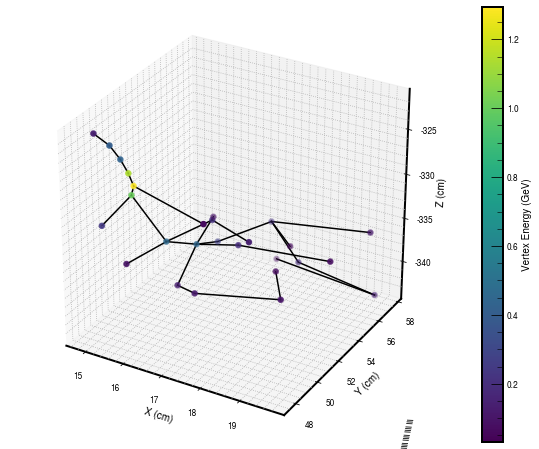

In [11]:
%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

fn.plotTrackster(
    fig, 
    ax, 
    vertices_x_l, 
    vertices_y_l, 
    vertices_z_l, 
    heatmap=vertices_E_l, 
    indexes=vertices_indexes_l, 
    edges=edges_l_1,
    label='Vertex Energy (GeV)'
)

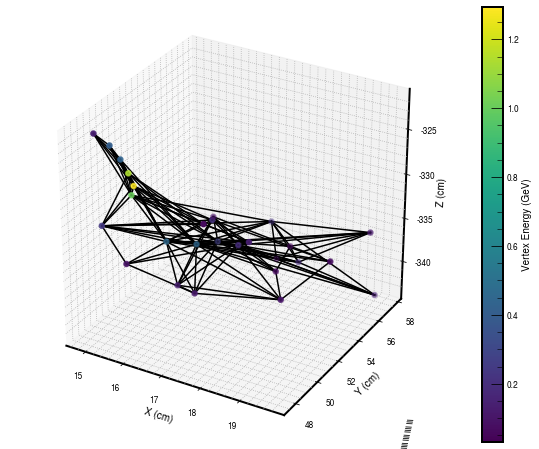

In [12]:
%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

fn.plotTrackster(
    fig, 
    ax, 
    vertices_x_l, 
    vertices_y_l, 
    vertices_z_l, 
    heatmap=vertices_E_l, 
    indexes=vertices_indexes_l, 
    edges=edges_l_5,
    label='Vertex Energy (GeV)'
)

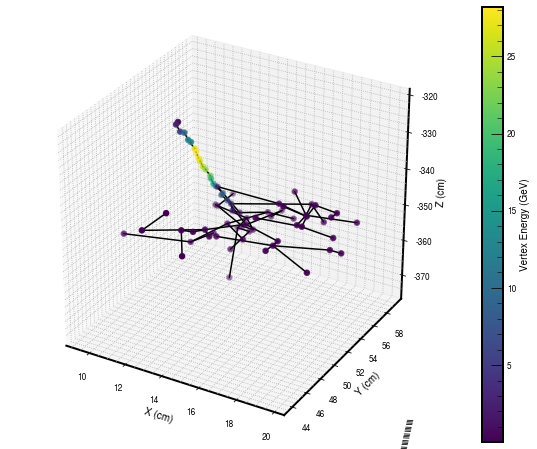

In [13]:
%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

fn.plotTrackster(
    fig, 
    ax, 
    vertices_x_h, 
    vertices_y_h, 
    vertices_z_h, 
    heatmap=vertices_E_h, 
    indexes=vertices_indexes_h, 
    edges=edges_h_1,
    label='Vertex Energy (GeV)'
)

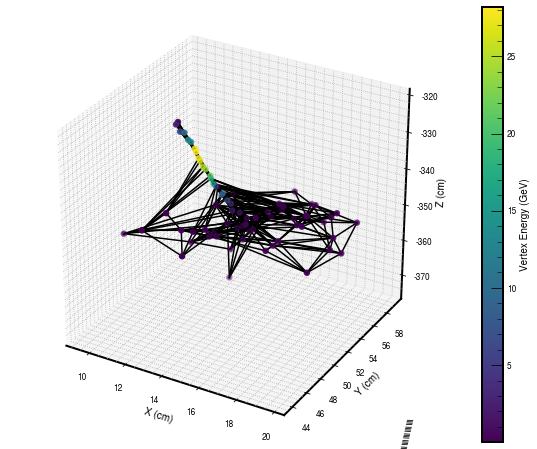

In [14]:
%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

fn.plotTrackster(
    fig, 
    ax, 
    vertices_x_h, 
    vertices_y_h, 
    vertices_z_h, 
    heatmap=vertices_E_h, 
    indexes=vertices_indexes_h, 
    edges=edges_h_5,
    label='Vertex Energy (GeV)'
)

In [15]:
c_eig_h_1 = fn.nXCentralityEigen(vertices_indexes_h,ak.flatten(edges_h_1[ak.num(edges_h_1) > 0].to_list()))
c_eig_h_5 = fn.nXCentralityEigen(vertices_indexes_h,ak.flatten(edges_h_5[ak.num(edges_h_5) > 0].to_list()))
c_eig_l_1 = fn.nXCentralityEigen(vertices_indexes_l,ak.flatten(edges_l_1[ak.num(edges_l_1) > 0].to_list()))
c_eig_l_5 = fn.nXCentralityEigen(vertices_indexes_l,ak.flatten(edges_l_5[ak.num(edges_l_5) > 0].to_list()))

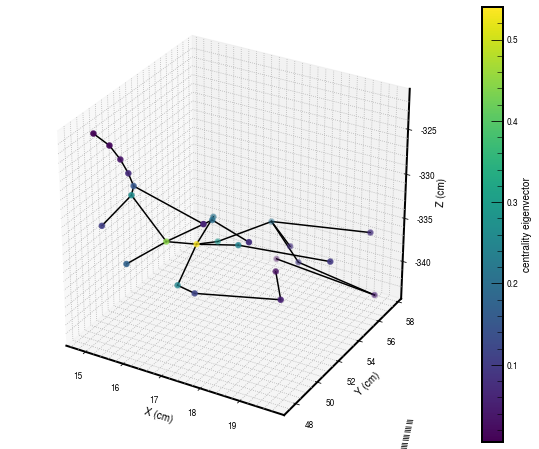

In [16]:
%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

fn.plotTrackster(
    fig, 
    ax, 
    vertices_x_l, 
    vertices_y_l, 
    vertices_z_l, 
    heatmap=c_eig_l_1, 
    indexes=vertices_indexes_l, 
    edges=edges_l_1,
    label='centrality eigenvector'
)

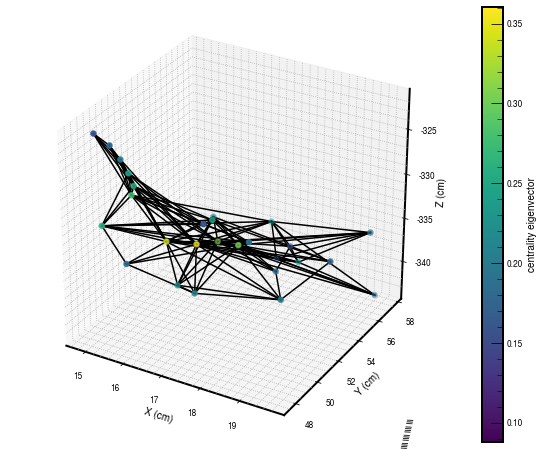

In [17]:
%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

fn.plotTrackster(
    fig, 
    ax, 
    vertices_x_l, 
    vertices_y_l, 
    vertices_z_l, 
    heatmap=c_eig_l_5, 
    indexes=vertices_indexes_l, 
    edges=edges_l_5,
    label='centrality eigenvector'
)

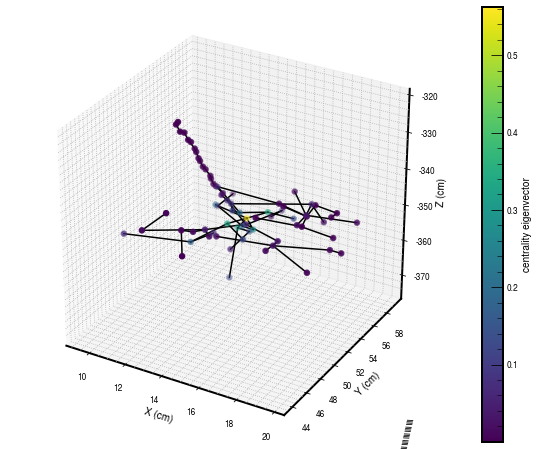

In [18]:
%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

fn.plotTrackster(
    fig, 
    ax, 
    vertices_x_h, 
    vertices_y_h, 
    vertices_z_h, 
    heatmap=c_eig_h_1, 
    indexes=vertices_indexes_h, 
    edges=edges_h_1,
    label='centrality eigenvector'
)

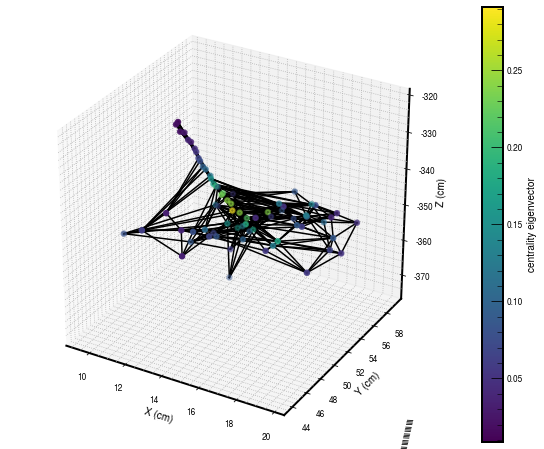

In [19]:
%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

fn.plotTrackster(
    fig, 
    ax, 
    vertices_x_h, 
    vertices_y_h, 
    vertices_z_h, 
    heatmap=c_eig_h_5, 
    indexes=vertices_indexes_h, 
    edges=edges_h_5,
    label='centrality eigenvector'
)

In [20]:
edges_h_1 = ak.flatten(edges_h_1[ak.num(edges_h_1) > 0].to_list())
edges_h_5 = ak.flatten(edges_h_5[ak.num(edges_h_5) > 0].to_list())
edges_l_1 = ak.flatten(edges_l_1[ak.num(edges_l_1) > 0].to_list())
edges_l_5 = ak.flatten(edges_l_5[ak.num(edges_l_5) > 0].to_list())

In [21]:
fn.longestPathSource(vertices_indexes_h, edges_h_1, c_eig_h_1)

22

In [22]:
fn.longestPathSource(vertices_indexes_h, edges_h_5, c_eig_h_5)

4

In [23]:
fn.longestPathSource(vertices_indexes_l, edges_l_1, c_eig_l_1)

7

In [24]:
fn.longestPathSource(vertices_indexes_l, edges_l_5, c_eig_l_5)

2

In [26]:
ak.sum(ak.num(vertices_indexes,axis=-1) < 3)

0

In [8]:
badTracksters = ak.num(vertices_indexes,axis=-1) < 3
vertices_indexes_g = vertices_indexes[~badTracksters]
vertices_x_g = vertices_x[~badTracksters]
vertices_y_g = vertices_y[~badTracksters]
vertices_z_g = vertices_z[~badTracksters]
vertices_E_g = vertices_E[~badTracksters]

In [9]:
path1 = []
path5 = []
path1_norm = []
path5_norm = []
for ev in range(len(vertices_indexes_g)):
    for tr in range(len(vertices_indexes_g[ev])):
        v_ind = vertices_indexes_g[ev,tr]
        v_x = vertices_x_g[ev,tr]
        v_y = vertices_y_g[ev,tr]
        v_z = vertices_z_g[ev,tr]
        v_E = vertices_E_g[ev,tr]
        edges_1 = fn.edgeBuilderNew(
            v_ind,
            v_x, 
            v_y, 
            v_z, 
            v_E
        )
        edges_5 = fn.edgeBuilderNew(
            v_ind,
            v_x, 
            v_y, 
            v_z, 
            v_E,
            nEdg=5
        )
        edges_fl_1 = ak.flatten(edges_1[ak.num(edges_1) > 0].to_list())
        edges_fl_5 = ak.flatten(edges_5[ak.num(edges_5) > 0].to_list())
        c_eig_1 = fn.nXCentralityEigen(v_ind,edges_fl_1)
        c_eig_5 = fn.nXCentralityEigen(v_ind,edges_fl_5)
        path1.append(fn.longestPathSource(v_ind, edges_fl_1, c_eig_1))
        path5.append(fn.longestPathSource(v_ind, edges_fl_5, c_eig_5))
        path1_norm.append(fn.longestPathSource(v_ind, edges_fl_1, c_eig_1)/len(v_ind))
        path5_norm.append(fn.longestPathSource(v_ind, edges_fl_5, c_eig_5)/len(v_ind))

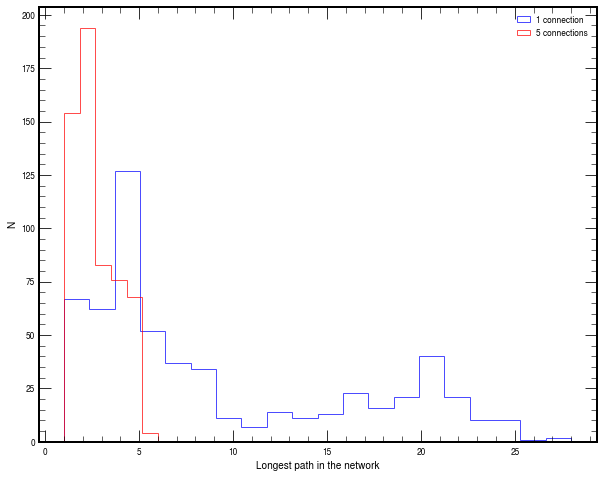

In [22]:
%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.hist(path1, histtype='step', bins=20, color='b', alpha=0.7, label='1 connection')
plt.hist(path5, histtype='step', bins=6, color='r', alpha=0.7, label='5 connections')
plt.legend()
plt.ylabel("N")
plt.xlabel("Longest path in the network")
plt.show()

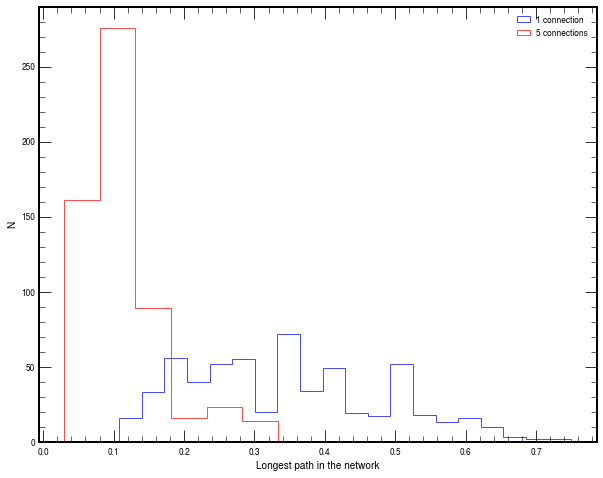

In [23]:
%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.hist(path1_norm, histtype='step', bins=20, color='b', alpha=0.7, label='1 connection')
plt.hist(path5_norm, histtype='step', bins=6, color='r', alpha=0.7, label='5 connections')
plt.legend()
plt.ylabel("N")
plt.xlabel("Longest path in the network")
plt.show()